In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

import warnings
warnings.filterwarnings('ignore')

# 파일, 변수 리스트

- 경쟁사이용: competitor
- 고객DOMO: demo
- 구매상품 TR: purprd
- 멤머십여부: member
- 상품분류: prodcl
- 채널이용: channel
- 분류:
- 분류로직:

In [2]:
file_list = os.listdir('../../data')
sorted(file_list)

['.DS_Store',
 '테이블명_컬럼명.png',
 '경쟁사이용.txt',
 '고객DEMO.txt',
 '구매상품TR.txt',
 '멤버십여부.txt',
 '분류.docx',
 '분류.txt',
 '분류로직.csv',
 '분류로직.xlsx',
 '상품분류.txt',
 '채널이용.txt']

# 고객 관련

## 1. 경쟁사이용 : competitor

In [3]:
# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
competitor

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


## 2. 고객DEMO : demo

In [4]:
# 고객DEMO
demo = pd.read_csv('../../data/고객DEMO.txt', encoding='cp949')
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


### 전처리

### 거주지역 nan 값 제거

In [5]:
# 1-1. non 값 제거

demo_ = demo.거주지역.unique()
# np.where(demo_== 'nan')
demo_ = np.delete(demo_, 12)
# demo_ = sorted([int(x) for x in demo_])
demo_

array([ 60., 100.,  33.,  16., 240.,  36.,  10.,  24.,  43., 210., 460.,
        55.,  47.,  39., 440.,  87.,  65.,  13.,  49., 360.,  69., 410.,
       340., 500.,  72., 610.,  45.,  75.,  82.,  30.,  79.,  27.,  52.,
       270., 540., 310.,  20., 570., 300.,  85., 630.])

### 거주지역 맵핑

In [6]:
# 1-2. area_code 맵핑
area_code = {10. : '서울특별시 강북구',
            13. : '서울특별시 도봉구',
            16. : '서울특별시 노원구',
            20. : '서울특별시 중랑구',
            24. : '서울특별시 동대문구',
            27. : '서울특별시 성북구',
            30. : '서울특별시 종로구',
            33. : '서울특별시 은평구',
            36. : '서울특별시 서대문구',
            39. : '서울특별시 마포구',
            43. : '서울특별시 용산구',
            45. : '서울특별시 중구',
            47. : '서울특별시 성동구',
            49. : '서울특별시 광진구',
            52. : '서울특별시 강동구',
            55. : '서울특별시 송파구',
            60. : '서울특별시 강남구',
            65. : '서울특별시 서초구',
            69. : '서울특별시 동작구',
            72. : '서울특별시 영등포구',
            75. : '서울특별시 강서구',
            79. : '서울특별시 양천구',
            82. : '서울특별시 구로구',
            85. : '서울특별시 금천구',
            87. : '서울특별시 관악구',
            100. : '경기도',
            210. : '인천광역시',
            240. : '강원도',
            270. : '충청북도',
            300. : '세종특별자치시',
            310. : '충청남도',
            340. : '대전광역시',
            360. : '경상북도',
            410. : '대구광역시',
            440. : '울산광역시',
            460. : '부산광역시',
            500. : '경상남도',
            540. : '전라북도',
            570. : '전라남도',
            610. : '광주광역시',
            630. : '제주특별자치도'
            }
demo = demo.replace({'거주지역':area_code})

### demo 사용 데이터

In [7]:
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


## 3. 멤버십여부 : member

In [8]:
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
member.head()

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411


## 4. 채널이용 : channel

In [241]:
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
channel

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


## 고객 데이터 merge

In [242]:
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


In [250]:
cust = pd.merge(demo, competitor, how='left')
cust = pd.merge(cust, member, how='left')
cust


,고객번호,성별,연령대,거주지역,제휴사,경쟁사,이용년월,멤버십명,가입년월
0,1,M,60세이상,서울특별시 강남구,A,A01,201507.0,NaN,NaN
1,1,M,60세이상,서울특별시 강남구,A,A02,201504.0,NaN,NaN
2,1,M,60세이상,서울특별시 강남구,B,B01,201501.0,NaN,NaN
3,1,M,60세이상,서울특별시 강남구,B,B01,201502.0,NaN,NaN
4,1,M,60세이상,서울특별시 강남구,B,B01,201507.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
43555,19379,F,20세~24세,서울특별시 동작구,NaN,NaN,NaN,롭스,201412.0
43556,19380,F,20세~24세,서울특별시 마포구,NaN,NaN,NaN,롭스,201412.0
43557,19381,F,40세~44세,부산광역시,NaN,NaN,NaN,다둥이,201506.0
43558,19382,F,45세~49세,부산광역시,NaN,NaN,NaN,NaN,NaN


# 상품 관련 

## 3. 구매상품TR : purprd

In [40]:
# 구매상품TR
purprd = pd.read_csv('../../data/구매상품TR.txt', encoding='cp949')
purprd= purprd.drop(columns=['대분류코드','중분류코드'])
purprd

,제휴사,영수증번호,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,B150401,17218,44,20140222,20,2420
1,B,8664000,B160101,17218,44,20140222,20,1070
2,B,8664000,B160201,17218,44,20140222,20,8060
3,B,8664000,B180301,17218,44,20140222,20,6000
4,B,8664001,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...
28593025,B,8116737,B370904,7439,29,20150525,19,14000
28593026,B,8116738,B370904,16421,29,20150525,20,6500
28593027,B,8116739,B080203,8266,29,20150525,13,16000
28593028,B,8116764,B900103,14316,29,20150526,19,1000


## 5. 상품분류 : prodcl

In [11]:
# 상품분류
prodcl = pd.read_csv('../../data/상품분류.txt', encoding='cp949')
prodcl

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품
...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우
4382,D,8,802,D080205,아이메이크업,메이크업세트
4383,D,8,803,D080301,립메이크업,립스틱/립라이너
4384,D,8,803,D080302,립메이크업,립글로즈/틴트


### 중분류명 맵핑

In [12]:
# 중분류명 맵핑
m_cat={
    'BABY/INFANT':'유아용품',
    'BOYS 1':'완구류',
    'BOYS 2':'완구류',
    'DIY욕실용품':'욕실용품',
    'DVD':'영상',
    'EDUCATION 1':'교육완구',
    'EDUCATION 2':'교육완구',
    'Fast Food':'즉석식품',
    'GIRLS':'여아완구',
    'H&B선물세트':'케어용품',
    'LOCAL김치채소':'채소류',
    'LOCAL잎채소':'채소류',
    'MP3/PMP':'음향기기',
    'NAVI/하이패스':'자동차용품',
    'NB구두':'패션잡화',
    'PC':'컴퓨터',
    'SPORTS/OUTDOOR':'레져',
    'TRAVEL':'여행용품',
    'TV':'대형가전',
    'VIDEOGAME':'게임류',
    '가공건식품':'공산식품',
    '가공란':'공산식품',
    '가공분말류':'공산식품',
    '가공식품':'공산식품',
    '가공양곡':'곡류',
    '가공우유':'유제품',
    '가구':'대형가구',
    '가구/인테리어샵':'종합가구',
    '가루':'공산식품',
    '가방':'패션잡화',
    '가방브랜드':'패션잡화',
    '가습기':"생활가전",
    '가정잡화':'생활용품',
    '간식':'즉석식품',
    '간식용과자':'공산식품',
    '간식조리':'즉석식품',
    '간편간식':'즉석식품',
    '간편요리':'즉석식품',
    '간편조리':'즉석식품',
    '간편조리생선':'즉석식품',
    '간편조리식품':'즉석식품',
    '간편조리행사':'즉석식품',
    '간편채소':'채소류',
    '감':'과일류',
    '감귤':'과일류',
    '감미료':'감미료',
    '개인위생용품':'위생용품',
    '건강가전':'생활가전',
    '건강기능식품':'건강기능식품',
    '건강디지털기기':'생활가전',
    '건강선물세트':'건강기능식품',
    '건강식품':'건강기능식품',
    '건과':'건과',
    '건과일':'건과',
    '건면':'공산식품',
    '건어가공':'건어류',
    '건어류':'건어류',
    '건오징어':'건어류',
    '건전지':'생활용품',
    '견과류':'건과',
    '계란':'알류',
    '계란류':'알류',
    '계절팩':'계절용품',
    '고등어/삼치':'어류',
    '고양이용품':'애완용품',
    '골프':'레져',
    '골프용품':'레져',
    '공구':'공구',
    '공기청정기':'생활가전',
    '과실과일':'과일류',
    '과자':'공산식품',
    '과채과일':'과일류',
    '과채류':'채소류',
    '과채음료':'공산식품',
    '교복':'기타의류',
    '교육':'교육완구',
    '교육보조재':'교육완구',
    '교환/보수용품':'자동차용품',
    '구강용품':'케어용품',
    '구강케어':'케어용품',
    '구기용품':'스포츠용품',
    '구두':'패션잡화',
    '구색과일':'과일류',
    '구이':'즉석식품',
    '구이찜조리':'즉석식품',
    '국내산계육':'조류',
    '국내산돈육':'돈육',
    '국내산우육':'우육',
    '국내화장품':'화장품',
    '국산게/갈치':'해산물',
    '국산과일':'과일류',
    '국산과일선물세트':'과일류',
    '굴비':'어류',
    '굴비/반건생선선물세트':'어류',
    '규격RTC':'즉석식품',
    '규격생선선물세트':'어류',
    '균일가':'다이소',
    '그릇/수저':'주방용품',
    '근채류':'채소류',
    '기기':'생활가전',
    '기능성건강':'건강기능식품',
    '기능성음료':'공산식품',
    '기능헤어케어':'케어용품',
    '기저귀':'위생용품',
    '기초화장품':'화장품',
    '기타':'기타',
    '기타구색생선':'어류',
    '기타국소고기':'우육',
    '기타수산':'수산물',
    '기타음주류':'공병/공박스',
    '기타음향기기':'음향기기',
    '기타의류':'기타의류',
    '기타조리식품':'즉석식품',
    '기타주방가전':'생활가전',
    '기타축산':'즉석식품',
    '기타회':'어류',
    '김/초밥':'즉석식품',
    '김가공품':'해조류',
    '김선물세트':'해조류',
    '김치냉장고':'대형가전',
    '김치류':'김치류',
    '김치채소':'채소류',
    '김치채소류':'채소류',
    '껌':'공산식품',
    '꽁치/가자미':'어류',
    '꿀':'감미료',
    '나물':'채소류',
    '나물류':'채소류',
    '낚시':'레져',
    '남성':'패션잡화',
    '남성 트랜디':'남성의류',
    '남성구두':'패션잡화',
    '남성베이직':'남성의류',
    '남성브랜드':'남성의류',
    '남성스포츠':'스포츠의류',
    '남성스포츠NPB':'스포츠의류',
    '남성스포츠PB':'스포츠의류',
    '남성스포츠특정':'스포츠의류',
    '남성시즌행사':'기타의류',
    '남성양말':'기타의류',
    '남성어덜트캐주얼':'남성의류',
    '남성용품':'케어용품',
    '남성이지캐주얼':'남성의류',
    '남성정장':'남성의류',
    '남성캐주얼':'남성의류',
    '남성케어':'케어용품',
    '남성행사':'남성의류',
    '남아':'완구류',
    '냉동HMR':'즉석식품',
    '냉동MS':'즉석식품',
    '냉동가공':'즉석식품',
    '냉동간식':'공산식품',
    '냉동과일':'과일류',
    '냉동규격생선':'어류',
    '냉동규격해물':'해산물',
    '냉동대용식':'즉석식품',
    '냉동만두':'즉석식품',
    '냉동수산물':'해산물',
    '냉장간식MS':'공산식품',
    '냉장간편식HMR':'즉석식품',
    '냉장고':'대형가전',
    '냉장규격생선':'어류',
    '냉장기타MS':'즉석식품',
    '냉장농산':'즉석식품',
    '냉장면류':'즉석식품',
    '냉장반찬':'즉석식품',
    '냉장수산':'즉석식품',
    '냉장식사HMR':'즉석식품',
    '냉장식사MS':'즉석식품',
    '냉장음료':'공산식품',
    '냉장축산':'가공육',
    '냉장햄세트':'가공육',
    '네일메이크업':'케어용품',
    '노트':'문구류',
    '노트/지류':'문구류',
    '농산물':'농산물',
    '단무지류':'공산식품',
    '닭고기':'조류',
    '담배':'담배',
    '대구':'어류',
    '대용식':'즉석식품',
    '대중선어':'어류',
    '대형가전':'대형가전',
    '덧신':'기타의류',
    '데일리처분':'데일리처분',
    '덴탈케어':'케어용품',
    '도미/민어':'어류',
    '도시락':'즉석식품',
    '동물병원':'애완용품',
    '돼지고기':'돈육',
    '두발용품':'케어용품',
    '두부':'공산식품',
    '두유':'공산식품',
    '두채류':'채소류',
    '드럭스토어':'드럭스토어',
    '드레스화브랜드':'패션잡화',
    '등산':'레져',
    '디자이너':'디자이너',
    '디저트':'공산식품',
    '딸기':'과일류',
    '떡':'즉석식품',
    '라면':'공산식품',
    '라켓스포츠':'스포츠용품',
    '란제리':'여성의류',
    '란제리/내의':'여성의류',
    '란제리브랜드':'여성의류',
    '레몬':'과일류',
    '레스토랑':'레스토랑',
    '레저취미':'애완용품',
    '롤러보드':'스포츠용품',
    '립메이크업':'화장품',
    '마담/어덜트':'여성의류',
    '마른김':'해조류',
    '마른안주':'건어류',
    '마른안주선물세트':'공산식품',
    '만두':'즉석식품',
    '맛집행사':'레스토랑',
    '망고':'과일류',
    '매트':'생활용품',
    '맥주':'주류',
    '먹거리':'레스토랑',
    '먹거리행사':'즉석식품',
    '메론':'과일류',
    '면도용품':'케어용품',
    '면류':'공산식품',
    '멸치':'건어류',
    '멸치건명태':'건어류',
    '멸치황태미역선물세트':'건어류',
    '명품':'명품',
    '모자':'패션잡화',
    '모피/피혁':'명품',
    '묵':'즉석식품',
    '묵/즉석참기름':'즉석식품',
    '문구/팬시':'서적',
    '문화용품':'문구류',
    '물티슈':'생활용품',
    '미국산소고기':'우육',
    '미술용품':'문구류',
    '미시캐주얼':'여성의류',
    '미역/다시마':'해조류',
    '미용소품':'케어용품',
    '미용잡화':'케어용품',
    '미용티슈':'케어용품',
    '미입점행사':'미입점행사',
    '믹서기':'생활가전',
    '밀대/걸레':'생활용품',
    '바나나':'과일류',
    '바디용품':'케어용품',
    '바디케어':'케어용품',
    '반건생선':'건어류',
    '반찬':'즉석식품',
    '반찬류':'즉석식품',
    '발효유':'공산식품',
    '밤':'과일류',
    '밥류':'즉석식품',
    '밥솥':'생활가전',
    '밥죽류':'즉석식품',
    '방향/제습/탈취제':'생활용품',
    '배':'과일류',
    '버섯':'채소류',
    '버섯류':'채소류',
    '베이비케어':'유아용품',
    '베이스메이크업':'화장품',
    '베이직케어':'케어용품',
    '베이커리':'즉석식품',
    '벨트':'패션잡화',
    '벽지류':'생활용품',
    '병통조림':'공산식품',
    '병행수입':'병행수입',
    '보석':'귀금속',
    '보수용품':'공구',
    '복숭아':'과일류',
    '복합샵':'SPA',
    '복합조미료':'감미료',
    '분식':'즉석식품',
    '분유':'유아용품',
    '브랜드':'기타의류',
    '브랜드돼지고기':'돈육',
    '브랜드빵':'즉석식품',
    '브랜드조리':'즉석식품',
    '브랜드침구':'침구류',
    '브랜드푸드몰':'레스토랑',
    '브랜드한우':'우육',
    '블라우스':'여성의류',
    '블루베리':'과일류',
    '비스켓':'공산식품',
    '비즈니스정장':'남성의류',
    '비타민':'건강기능식품',
    '빵':'즉석식품',
    '뿌리채소':'채소류',
    '사과':'과일류',
    '살충제':'생활용품',
    '상':'소형가구',
    '새우':'해산물',
    '색조화장품':'화장품',
    '샌들슬리퍼':'패션잡화',
    '샐러드/간편채소':'즉석식품',
    '샐러드채소':'채소류',
    '생리대':'위생용품',
    '생리용품':'위생용품',
    '생선선물세트':'어류',
    '생선초밥':'즉석식품',
    '생선회':'어류',
    '생수':'공산식품',
    '생활소형가전':'생활가전',
    '생활잡화':'생활용품',
    '생활한방':'기타식품',
    '서적':'서적',
    '석류':'과일류',
    '선물세트':'선물세트',
    '선식':'즉석식품',
    '선식류':'즉석식품',
    '선어가공':'해산물',
    '선어류':'어류',
    '선케어':'케어용품',
    '선풍기':'생활가전',
    '섬유유연제':'케어용품',
    '섬유잡화':'패션잡화',
    '성인내의':'기타의류',
    '성인침구':'침구류',
    '성인침구류':'침구류',
    '세차용품':'자동차용품',
    '세탁기':'대형가전',
    '세탁세제':'케어용품',
    '세탁용품':'생활용품',
    '셔츠':'남성의류',
    '소가구':'소형가구',
    '소금/설탕류':'감미료',
    '소스류':'공산식품',
    '소시지':'가공육',
    '소주':'주류',
    '소형가전':'생활가전',
    '소형음향기기':'음향기기',
    '수납용품':'생활용품',
    '수도용품':'생활용품',
    '수박':'과일류',
    '수산품':'해산물',
    '수영복':'레져',
    '수예소품':'생활용품',
    '수예시즌':'생활용품',
    '수입갈치':'어류',
    '수입감귤과일':'과일류',
    '수입게':'해산물',
    '수입고등어':'어류',
    '수입과일':'과일류',
    '수입과자':'공산식품',
    '수입기타과일':'과일류',
    '수입기타생선':'어류',
    '수입돈육':'돈육',
    '수입돼지고기':'돈육',
    '수입브랜드':'수입브랜드',
    '수입연어':'어류',
    '수입우육':'우육',
    '수입육':'우육',
    '수입육선물세트':'가공육',
    '수입음료':'공산식품',
    '수입조미':'감미료',
    '수입포도':'과일류',
    '수족관용품':'레져',
    '순대':'즉석식품',
    '슈즈용품':'케어용품',
    '슈즈행사':'패션잡화',
    '스낵':'공산식품',
    '스카프':'패션잡화',
    '스키':'레져',
    '스킨케어':'케어용품',
    '스타킹':'기타의류',
    '스트리트편집샵':'편집샵',
    '스포츠':'스포츠의류',
    '스포츠ACC':'스포츠용품',
    '스포츠NB':'패션잡화',
    '스포츠브랜드편집':'패션잡화',
    '스포츠슈즈':'패션잡화',
    '스포츠웨어':'스포츠의류',
    '스포츠의류':'스포츠의류',
    '시계':'시계',
    '시니어건강용품':'생활용품',
    '시니어위생용품':'케어용품',
    '시리얼':'공산식품',
    '시즌/건강가전':'계절용품',
    '시즌반찬':'즉석식품',
    '시즌슈즈':'패션잡화',
    '시즌잡화':'패션잡화',
    '시즌차':'공산식품',
    '시즌토탈':'시즌토탈',
    '시즌행사':'시즌행사',
    '시티웨어':'기타의류',
    '시티캐주얼':'스포츠의류',
    '식기':'주방용품',
    '식사류':'즉석식품',
    '식용유':'공산식품',
    '식용유지':'공산식품',
    '식자재':'공산식품',
    '썬글라스':'패션잡화',
    '씨리얼':'공산식품',
    '아동':'유아용품',
    '아동내의':'유아용품',
    '아동복합샵':'유아용품',
    '아동브랜드':'유아용품',
    '아동슈즈':'유아용품',
    '아동양말':'유아용품',
    '아동침구':'침구류',
    '아동침구류':'침구류',
    '아동행사':'유아용품',
    '아동화브랜드':'유아용품',
    '아로마':'케어용품',
    '아웃도어퍼니처':'레져',
    '아이메이크업':'화장품',
    '아이스크림':'공산식품',
    '악기':'악기',
    '안전용품':'생활용품',
    '안주':'공산식품',
    '애견용품':'애완용품',
    '애완/동물용품':'애완용품',
    '액상조미료':'감미료',
    '액세서리':'패션잡화',
    '야외/시즌용품':'레져',
    '야외용품':'생활용품',
    '약초':'기타식품',
    '양곡':'곡류',
    '양념류':'채소류',
    '양념육':'즉석식품',
    '양념채소':'채소류',
    '양말':'기타의류',
    '양말류':'기타의류',
    '양말선물세트':'기타의류',
    '양식':'레스토랑',
    '양주':'주류',
    '양채류':'채소류',
    '어묵맛살':'즉석식품',
    '언더웨어행사':'기타의류',
    '에어컨':'대형가전',
    '여성':'패션잡화',
    '여성NPB':'여성의류',
    '여성PB':'여성의류',
    '여성구두':'패션잡화',
    '여성베이직':'여성의류',
    '여성양말':'기타의류',
    '여성용품':'위생용품',
    '여성위생용품':'위생용품',
    '여성이지캐주얼':'여성의류',
    '여성캐주얼브랜드':'여성의류',
    '여성특정':'여성의류',
    '여행용품':'여행용품',
    '연체':'연체류',
    '열대과일':'과일류',
    '열대과일기타':'과일류',
    '열대과일선물세트':'과일류',
    '열매채소':'채소류',
    '엽채류':'채소류',
    '영상':'영상',
    '예능학용품':'교육완구',
    '오디오':'음향기기',
    '오렌지':'과일류',
    '오렌지과일기타':'과일류',
    '오렌지과일선물세트':'과일류',
    '오리고기':'조류',
    '오징어':'연체류',
    '오토바이용품':'레져',
    '오피스용품':'문구류',
    '온라인규격/간편조리생선':'어류',
    '온라인돼지고기':'돈육',
    '온라인버섯/열매채소':'채소류',
    '온라인양념/뿌리채소':'채소류',
    '온라인양말':'기타의류',
    '온라인잎/샐러드채소':'채소류',
    '온라인잡곡선식':'곡류',
    '온라인저장과일':'과일류',
    '온라인해물연체':'연체류',
    '온라인화장품':'화장품',
    '와인':'주류',
    '요구르트':'유제품',
    '욕실용품':'생활용품',
    '우산/양산':'생활용품',
    '우산/양산류':'생활용품',
    '우유':'유제품',
    '우육':'우육',
    '운동화':'패션잡화',
    '워터스포츠':'레져',
    '원두커피':'공산식품',
    '원예용품':'기타',
    '웨딩':'기타',
    '위생용품':'위생용품',
    '윈터스포츠':'레져',
    '유/아동서적':'유아용품',
    '유가공':'공산식품',
    '유아동NPB':'유아용품',
    '유아동PB':'유아용품',
    '유아동용품':'유아용품',
    '유아동특정':'유아용품',
    '유아브랜드':'유아용품',
    '유아세제':'유아용품',
    '유아식기':'유아용품',
    '유아용품':'유아용품',
    '유아위생용품':'위생용품',
    '유아토들러':'유아용품',
    '유제품':'공산식품',
    '육가공품':'가공육',
    '육류':'육류',
    '육포':'가공육',
    '음료':'공산식품',
    '음반':'음반',
    '음반영상':'영상',
    '음식저장/보관':'생활용품',
    '음식조리':'주방용품',
    '의류잡화':'패션잡화',
    '의자':'소형가구',
    '의자/상':'소형가구',
    '이동통신':'기타',
    '이벤트조리':'즉석식품',
    '이온음료':'공산식품',
    '이유식/유아간식':'유아용품',
    '이지캐주얼브랜드':'편집샵',
    '인스턴트선물세트':'공산식품',
    '인스턴트커피':'공산식품',
    '일반서적':'서적',
    '일반욕실용품':'욕실용품',
    '일반의약외품':'일반의약외품',
    '일반한우':'우육',
    '일반헤어케어':'케어용품',
    '일식':'레스토랑',
    '일용잡화':'생활용품',
    '잎채소':'채소류',
    '자동차 액세서리':'자동차용품',
    '자동차 정비용품':'자동차용품',
    '자동차 청소용품':'자동차용품',
    '자동차 편의용품':'자동차용품',
    '자동차방향제/소취제':'자동차용품',
    '자동차장식용품':'자동차용품',
    '자동차처분':'유아용품',
    '자두':'과일류',
    '자몽':'과일류',
    '자전거':'레져',
    '잡곡':'곡류',
    '잡곡류':'곡류',
    '잡화멀티샵':'편집샵',
    '장갑':'패션잡화',
    '장류':'감미료',
    '장식용품':'생활용품',
    '장착용품':'기타',
    '잼':'공산식품',
    '전구':'생활용품',
    '전기면도기':'생활가전',
    '전기요/장판':'계절용품',
    '전기용품':'생활용품',
    '전기전자':'생활가전',
    '전기포트':'생활가전',
    '전자/전기':'명품',
    '전자악기':'악기',
    '전자학습기':'교육완구',
    '전통간식':'즉석식품',
    '전통과자':'즉석식품',
    '전통주':'주류',
    '전화기/팩스':'생활가전',
    '젓갈/반찬':'즉석식품',
    '젓갈류':'즉석식품',
    '정수기':'생활가전',
    '제기용품':'기타',
    '제습제':'케어용품',
    '조개':'해산물',
    '조개살':'해산물',
    '조기/명태':'어류',
    '조리기':'생활가전',
    '조리도구':'주방용품',
    '조리반찬':'즉석식품',
    '조리용기':'주방용품',
    '조명/전구':'생활용품',
    '조명기구':'생활가전',
    '조미김':'공산식품',
    '조미료':'감미료',
    '조미선물세트':'감미료',
    '조미오징어':'건어류',
    '족발':'즉석식품',
    '종량제봉투':'기타',
    '종합과자':'공산식품',
    '주거세제':'케어용품',
    '주니어스포츠':'스포츠의류',
    '주니어양말':'기타의류',
    '주니어웨어':'아동의류',
    '주류':'주류',
    '주방가전':'생활가전',
    '주방세제':'케어용품',
    '주방소형가전':'생활가전',
    '주방시즌/균일가':'주방용품',
    '주방용품':'주방용품',
    '주방정리':'주방용품',
    '주방주거세제':'케어용품',
    '주유소':'기타',
    '준보석':'귀금속',
    '준보석/시계':'시계',
    '중식':'레스토랑',
    '쥐치포':'건어류',
    '즉석구이김':'해조류',
    '즉석구이안주':'즉석식품',
    '즉석도정미':'곡류',
    '즉석식품':'즉석식품',
    '즉석참기름':'감미료',
    '지갑':'패션잡화',
    '지갑/벨트':'패션잡화',
    '집중케어':'케어용품',
    '차':'공산식품',
    '차/커피':'공산식품',
    '차류':'공산식품',
    '차별화돼지고기':'돈육',
    '차선물세트':'공산식품',
    '차음료':'공산식품',
    '참외':'과일류',
    '천연조미료':'감미료',
    '청소기':'생활가전',
    '청소욕실용품':'생활용품',
    '청소용품':'생활용품',
    '청소편의도구':'생활용품',
    '체리':'과일류',
    '초콜렛':'공산식품',
    '초콜릿':'공산식품',
    '축산가공':'유제품',
    '치즈':'유제품',
    '치즈버터':'유제품',
    '친환경과일':'과일류',
    '친환경채소':'채소류',
    '침구/수예':'침구류',
    '카메라/캠코더':'생활가전',
    '카시트/매트':'자동차용품',
    '카페':'레스토랑',
    '캐주얼':'편집샵',
    '캐주얼슈즈':'패션잡화',
    '캐주얼화브랜드':'패션잡화',
    '캔디':'공산식품',
    '캔디껌류':'공산식품',
    '캠핑':'레져',
    '커리어':'기타',
    '커튼류':'생활용품',
    '커피':'공산식품',
    '커피류':'공산식품',
    '커피메이커/머신':'생활가전',
    '커피선물세트':'공산식품',
    '커피음료':'공산식품',
    '커피차음료':'공산식품',
    '컨세션':'기타',
    '컴퓨터주변기기':'컴퓨터',
    '케첩마요네즈':'공산식품',
    '콩나물':'채소류',
    '쿠키케이크':'공산식품',
    '클렌징':'케어용품',
    '키위':'과일류',
    '키위/석류':'공산식품',
    '키친타올':'주방용품',
    '탄산음료':'공산식품',
    '탈취제':'케어용품',
    '테이블':'대형가구',
    '토마토':'과일류',
    '통신/컴퓨터':'컴퓨터',
    '통조림':'공산식품',
    '튀김':'즉석식품',
    '튀김조리':'즉석식품',
    '트래디셔널':'편집샵',
    '특산물':'즉석식품',
    '특산물행사':'건어류',
    '파이':'공산식품',
    '파인애플':'과일류',
    '파티/팬시':'문구류',
    '파티/팬시/시즌':'기타',
    '파티/팬시용품':'기타',
    '판매시설':'기타',
    '패브릭욕실용품':'욕실용품',
    '패스트푸드':'레스토랑',
    '편의시설':'기타',
    '포도':'과일류',
    '포도/체리':'과일류',
    '포장반찬':'즉석식품',
    '포장반찬HMR':'즉석식품',
    '포장젓갈':'즉석식품',
    '표백제':'케어용품',
    '푸드코트':'레스토랑',
    '풋/핸드케어':'케어용품',
    '프리미엄과자':'공산식품',
    '프리미엄매트':'생활용품',
    '피자':'레스토랑',
    '피트니스':'헬스케어',
    '피혁브랜드':'패션잡화',
    '피혁잡화':'패션잡화',
    '피혁토탈':'패션잡화',
    '필기도구':'문구류',
    '한과':'공산식품',
    '한방식재류':'기타식품',
    '한방차':'기타식품',
    '한식':'레스토랑',
    '한우선물세트':'우육',
    '해물류':'해산물',
    '해물선물세트':'해산물',
    '해물연체류':'해산물',
    '해조류':'해조류',
    '해초':'해조류',
    '해초류':'해조류',
    '핸드/풋케어':'케어용품',
    '핸드백':'패션잡화',
    '햄':'가공육',
    '햄소시지':'가공육',
    '행사':'패션잡화',
    '향신료':'감미료',
    '헤어스타일링':'케어용품',
    '헤어케어':'케어용품',
    '헬스용품':'헬스케어',
    '호주산소고기':'우육',
    '홈시어터':'대형가전',
    '홈웨어':'기타의류',
    '홍인삼':'공산식품',
    '화장지':'생활용품',
    '화장지/티슈':'생활용품',
    '화장품':'화장품',
    '화장품브랜드샵':'화장품',
    '황태':'건어류',
    '훼이셜케어':'케어용품',
    '휴대폰용품':'생활용품',
    '휴지통':'생활용품',
    '흰우유':'유제품',
    '히터기':'계절용품'
}

In [21]:
# 'new중분류명'으로 'old중분류명' 찾기

def check_list(x):
    for i in m_cat.keys():
        if x in m_cat[i]:
            print(i)
        
check_list('유제품')

가공우유
요구르트
우유
축산가공
치즈
치즈버터
흰우유


In [14]:
# 'old중분류명' -> 'nes중분류명' 바꾸기
prodcl = prodcl.replace({'중분류명':m_cat})
prodcl.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,생활용품,위생세제
1,A,1,101,A010102,생활용품,휴지류
2,A,1,101,A010103,생활용품,뷰티상품
3,A,1,101,A010104,생활용품,일용잡화
4,A,1,101,A010105,생활용품,세트상품


### 대분류명 맵핑

In [18]:
# 대분류명 맵핑
def find_b_cat(x):
    b_cat = {
    '식품':['가공육','감미료','건강기능식품','건과','건어류','곡류','공산식품','과일류','기타식품',\
          '김치류','농산물','돈육','레스토랑','수산물','알류','어류','연체류','우육','유제품','육류',\
          '조류','주류','즉석식품','채소류','해산물','해조류'],
    '일상용품':['계절용품','공구','문구류','생활용품','애완용품','여아완구','완구류','욕실용품','위생용품','유아용품',\
            '자동차용품','주방용품','침구류','케어용품','헬스케어','화장품'],
    '의약품/의료기기':['일반의약외품'],
    '교육/문화용품':['교육완구','서적','악기','영상','음반'],
    '디지털/가전':['게임류','대형가전','생활가전','음향기기','컴퓨터'],
    '가구/인테리어':['대형가구','소형가구','종합가구'],
    '의류':['기타의류','남성의류','여성의류','디자이너','수입브랜드','아동의류'],
    '전문스포츠/레저':['레져','스포츠용품','스포츠의류','여행용품'],
    '패션잡화':['SPA','귀금속','명품','시계','패션잡화','편집샵'],
    '기타상품':['공병/공박스','기타','다이소','담배','데일리처분','드럭스토어','미입점행사','병행수입','선물세트','시즌토탈','시즌행사']
    }
    # print(b_cat.keys())
    for i in b_cat.keys():
        if x in b_cat[i]:
            return i

find_b_cat('SPA')

'패션잡화'

In [16]:
# 'new중분류명' 으로 대분류명 추가하기
prodcl['대분류명'] = prodcl['중분류명'].apply(lambda x : find_b_cat(x))
prodcl

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류명
0,A,1,101,A010101,생활용품,위생세제,일상용품
1,A,1,101,A010102,생활용품,휴지류,일상용품
2,A,1,101,A010103,생활용품,뷰티상품,일상용품
3,A,1,101,A010104,생활용품,일용잡화,일상용품
4,A,1,101,A010105,생활용품,세트상품,일상용품
...,...,...,...,...,...,...,...
4381,D,8,802,D080204,화장품,아이섀도우,일상용품
4382,D,8,802,D080205,화장품,메이크업세트,일상용품
4383,D,8,803,D080301,화장품,립스틱/립라이너,일상용품
4384,D,8,803,D080302,화장품,립글로즈/틴트,일상용품


### prodcl 사용 데이터

In [17]:
prodcl = prodcl.drop(['대분류코드', '중분류코드'], axis=1)
prodcl = prodcl[['제휴사', '대분류명', '중분류명','소분류코드', '소분류명']]
prodcl

,제휴사,대분류명,중분류명,소분류코드,소분류명
0,A,일상용품,생활용품,A010101,위생세제
1,A,일상용품,생활용품,A010102,휴지류
2,A,일상용품,생활용품,A010103,뷰티상품
3,A,일상용품,생활용품,A010104,일용잡화
4,A,일상용품,생활용품,A010105,세트상품
...,...,...,...,...,...
4381,D,일상용품,화장품,D080204,아이섀도우
4382,D,일상용품,화장품,D080205,메이크업세트
4383,D,일상용품,화장품,D080301,립스틱/립라이너
4384,D,일상용품,화장품,D080302,립글로즈/틴트


In [ ]:
# 데이터 백업
# prodcl.to_pickle("./pickle/prodcl")
# prodcl = pd.read_pickle('./pickle/prodcl')
# prodcl

## 상품 데이터 merge

In [60]:
# 상품 데이터 merge 사용 데이터
prod = pd.merge(purprd,prodcl)
prod = prod[['영수증번호', '제휴사', '점포코드', '고객번호', '구매일자', '구매시간', '구매금액', '대분류명', '중분류명', '소분류코드', '소분류명']]
prod = prod.sort_values(by=['제휴사','점포코드','고객번호','구매일자','구매시간'])
prod = prod.reset_index(drop=True)
prod

,영수증번호,제휴사,점포코드,고객번호,구매일자,구매시간,구매금액,대분류명,중분류명,소분류코드,소분류명
0,1616376,A,1,2,20140327,18,51300,일상용품,화장품,A020303,색조 화장품
1,1616373,A,1,2,20140327,18,152950,일상용품,화장품,A020303,색조 화장품
2,4760619,A,1,2,20150721,15,29900,일상용품,유아용품,A030109,유아복
3,5433506,A,1,2,20151104,18,38000,식품,공산식품,A010644,식당가 한식
4,2201083,A,1,3,20140623,11,80000,의류,남성의류,A050501,비지니스군
...,...,...,...,...,...,...,...,...,...,...,...
28593025,264245,D,53,18469,20151231,2,4400,일상용품,케어용품,D020401,치약
28593026,264245,D,53,18469,20151231,2,2000,일상용품,케어용품,D060103,메탈미용소도구
28593027,264207,D,53,18513,20151229,19,3150,식품,공산식품,D040109,쿠키
28593028,264207,D,53,18513,20151229,19,2700,일상용품,케어용품,D060106,스폰지/퍼프


In [61]:
# 데이터 백업
prod.to_pickle("./pickle/prod")
prod = pd.read_pickle('./pickle/prod')
prod

,영수증번호,제휴사,점포코드,고객번호,구매일자,구매시간,구매금액,대분류명,중분류명,소분류코드,소분류명
0,1616376,A,1,2,20140327,18,51300,일상용품,화장품,A020303,색조 화장품
1,1616373,A,1,2,20140327,18,152950,일상용품,화장품,A020303,색조 화장품
2,4760619,A,1,2,20150721,15,29900,일상용품,유아용품,A030109,유아복
3,5433506,A,1,2,20151104,18,38000,식품,공산식품,A010644,식당가 한식
4,2201083,A,1,3,20140623,11,80000,의류,남성의류,A050501,비지니스군
...,...,...,...,...,...,...,...,...,...,...,...
28593025,264245,D,53,18469,20151231,2,4400,일상용품,케어용품,D020401,치약
28593026,264245,D,53,18469,20151231,2,2000,일상용품,케어용품,D060103,메탈미용소도구
28593027,264207,D,53,18513,20151229,19,3150,식품,공산식품,D040109,쿠키
28593028,264207,D,53,18513,20151229,19,2700,일상용품,케어용품,D060106,스폰지/퍼프


In [62]:
prod

,영수증번호,제휴사,점포코드,고객번호,구매일자,구매시간,구매금액,대분류명,중분류명,소분류코드,소분류명
0,1616376,A,1,2,20140327,18,51300,일상용품,화장품,A020303,색조 화장품
1,1616373,A,1,2,20140327,18,152950,일상용품,화장품,A020303,색조 화장품
2,4760619,A,1,2,20150721,15,29900,일상용품,유아용품,A030109,유아복
3,5433506,A,1,2,20151104,18,38000,식품,공산식품,A010644,식당가 한식
4,2201083,A,1,3,20140623,11,80000,의류,남성의류,A050501,비지니스군
...,...,...,...,...,...,...,...,...,...,...,...
28593025,264245,D,53,18469,20151231,2,4400,일상용품,케어용품,D020401,치약
28593026,264245,D,53,18469,20151231,2,2000,일상용품,케어용품,D060103,메탈미용소도구
28593027,264207,D,53,18513,20151229,19,3150,식품,공산식품,D040109,쿠키
28593028,264207,D,53,18513,20151229,19,2700,일상용품,케어용품,D060106,스폰지/퍼프


# EDA

## 제휴사 별, 월별 매출액

In [182]:
prod_co_salse = prod.groupby(['제휴사', '구매일자'], as_index=False)
prod_co_salse = prod_co_salse.구매금액.sum()
prod_co_salse
# prod_co_salse[prod_co_salse.제휴사=='A']

,제휴사,구매일자,구매금액
0,A,20140101,39617840
1,A,20140102,774322070
2,A,20140103,1327356700
3,A,20140104,913925210
4,A,20140105,902242900
...,...,...,...
2910,D,20151227,1660260
2911,D,20151228,1691270
2912,D,20151229,2419720
2913,D,20151230,2130350


In [184]:
prod_co_month_salse = prod_co_salse.copy()
prod_co_month_salse['구매월'] = prod_co_salse.구매일자.astype(str).map(lambda x : x[:-2])
prod_co_month_salse = prod_co_month_salse.groupby(['제휴사','구매월'], as_index=False)['구매금액'].sum()
prod_co_month_salse

,제휴사,구매월,구매금액
0,A,201401,20957673260
1,A,201402,17079312000
2,A,201403,19982329370
3,A,201404,19928395250
4,A,201405,21800068960
...,...,...,...
91,D,201508,46882120
92,D,201509,54134590
93,D,201510,47680630
94,D,201511,47320470


### 그래프

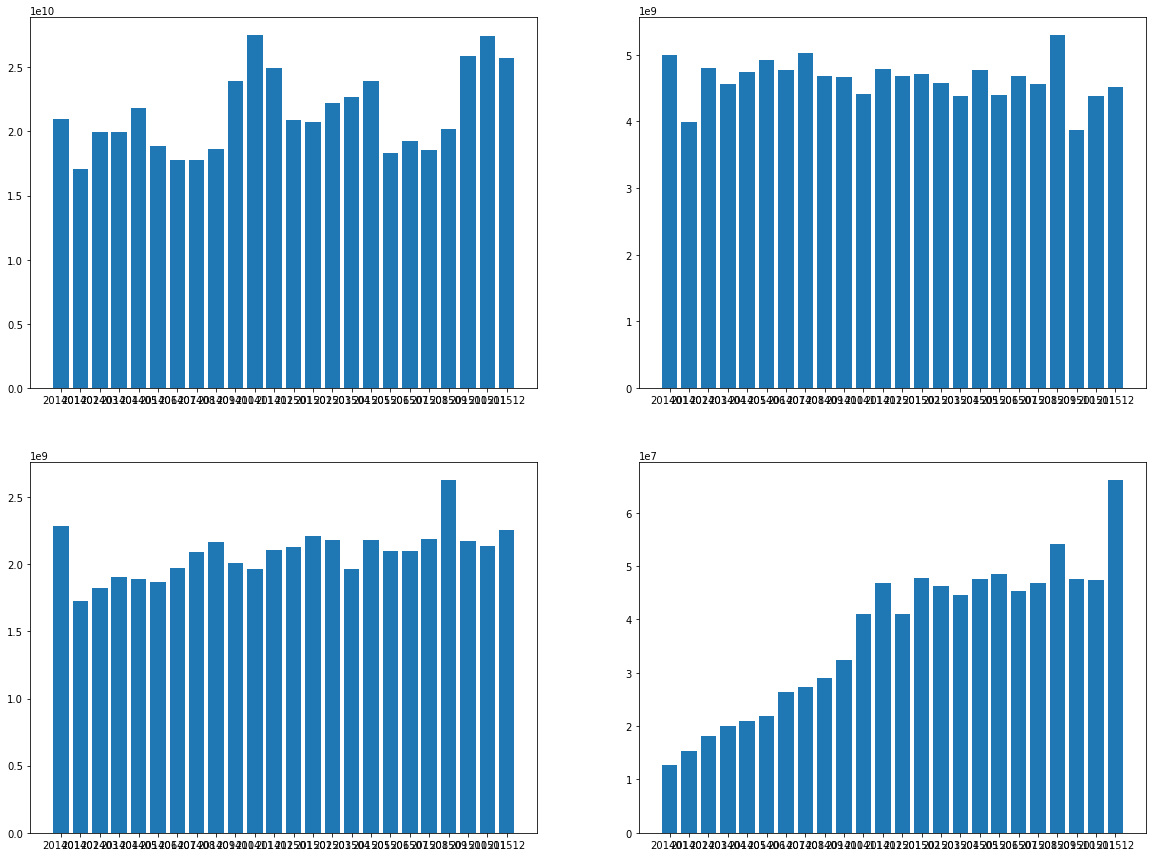

In [185]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,2,1)
ax1.bar(prod_co_month_salse[prod_co_month_salse.제휴사=='A'].구매월.astype(str), prod_co_month_salse[prod_co_month_salse.제휴사=='A'].구매금액, label='A')
ax2 = fig.add_subplot(2,2,2)
ax2.bar(prod_co_month_salse[prod_co_month_salse.제휴사=='B'].구매월.astype(str), prod_co_month_salse[prod_co_month_salse.제휴사=='B'].구매금액, label='B')
ax3 = fig.add_subplot(2,2,3)
ax3.bar(prod_co_month_salse[prod_co_month_salse.제휴사=='C'].구매월.astype(str), prod_co_month_salse[prod_co_month_salse.제휴사=='C'].구매금액, label='C')
ax4 = fig.add_subplot(2,2,4)
ax4.bar(prod_co_month_salse[prod_co_month_salse.제휴사=='D'].구매월.astype(str), prod_co_month_salse[prod_co_month_salse.제휴사=='D'].구매금액, label='D')
plt.show()

## 제휴사별 고객별 평균 구매금액

In [222]:
from math import log10, log2
prod_co_cust_pur_mean = prod.copy()
prod_co_cust_pur_mean = prod_co_cust_pur_mean.groupby(['제휴사', '고객번호'])['구매금액'].mean().map(log2)
prod_co_cust_pur_mean=prod_co_cust_pur_mean.reset_index()
prod_co_cust_pur_mean.head()


,제휴사,고객번호,구매금액
0,A,1,16.539061
1,A,2,16.490723
2,A,3,16.287712
3,A,4,14.424873
4,A,5,14.177508


In [223]:
print(max(prod_co_cust_pur_mean.구매금액))
print(min(prod_co_cust_pur_mean.구매금액))

23.728105771081413
4.321928094887363


### 그래프

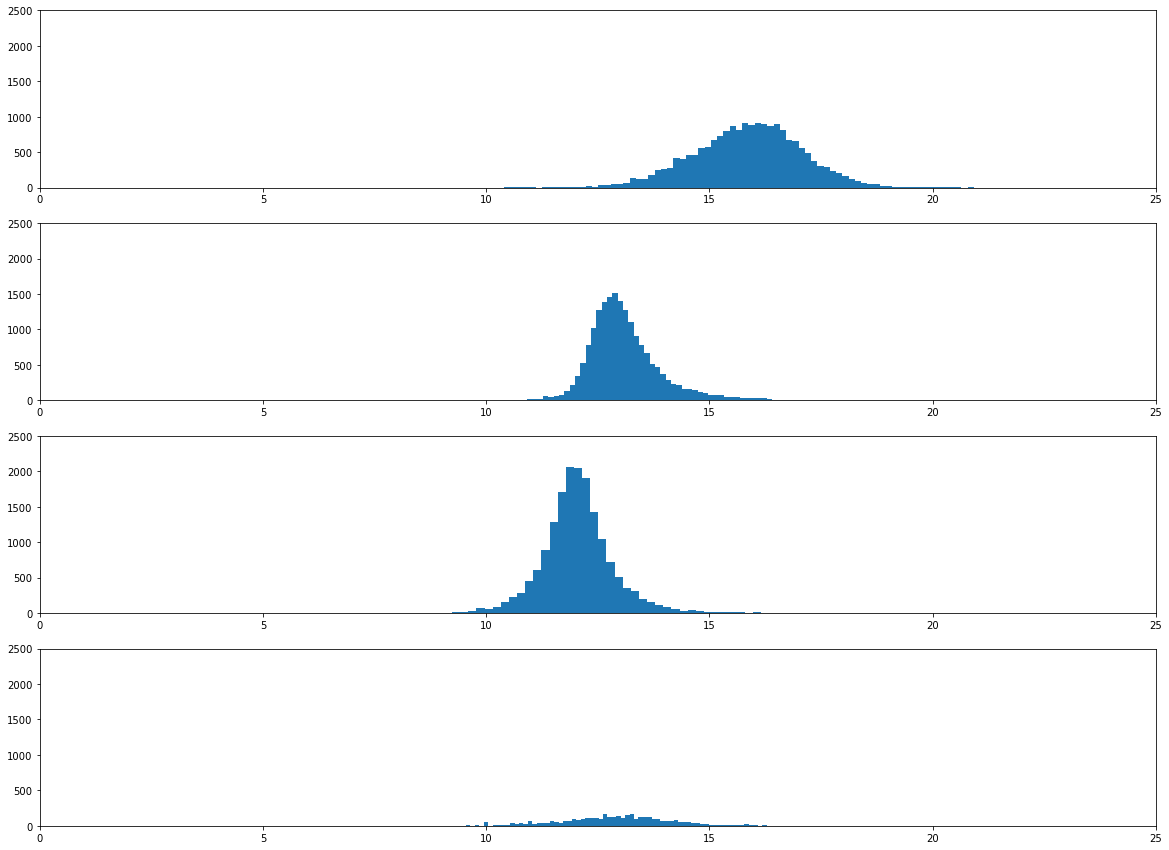

In [265]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(4,1,1)
ax1.hist(prod_co_cust_pur_mean[prod_co_cust_pur_mean.제휴사=='A'].구매금액, bins=100)
ax1.set_xlim(0, 25)
ax1.set_ylim(0, 2500)
ax2 = fig.add_subplot(4,1,2)
ax2.hist(prod_co_cust_pur_mean[prod_co_cust_pur_mean.제휴사=='B'].구매금액, bins=100)
ax2.set_xlim(0, 25)
ax2.set_ylim(0, 2500)
ax3 = fig.add_subplot(4,1,3)
ax3.hist(prod_co_cust_pur_mean[prod_co_cust_pur_mean.제휴사=='C'].구매금액, bins=100)
ax3.set_xlim(0, 25)
ax3.set_ylim(0, 2500)
ax4 = fig.add_subplot(4,1,4)
ax4.hist(prod_co_cust_pur_mean[prod_co_cust_pur_mean.제휴사=='D'].구매금액, bins=100)
ax4.set_xlim(0, 25)
ax4.set_ylim(0, 2500)
plt.show()

## 제휴사별 가장 많이 매출을 기록한 대분류명, 중분류명

In [ ]:
co_amount_m_cat = prod.copy()

In [261]:
display(co_amount_m_cat[co_amount_m_cat.제휴사=='A'].대분류명.value_counts()[:3])
display(co_amount_m_cat[co_amount_m_cat.제휴사=='A'].중분류명.value_counts()[:3])

식품      3334114
패션잡화     981927
일상용품     835324
Name: 대분류명, dtype: int64

공산식품    1497579
농산물      820228
편집샵      602827
Name: 중분류명, dtype: int64

In [262]:
display(co_amount_m_cat[co_amount_m_cat.제휴사=='B'].대분류명.value_counts()[:3])
display(co_amount_m_cat[co_amount_m_cat.제휴사=='B'].중분류명.value_counts()[:3])

식품      10526302
일상용품     1857854
기타상품      455718
Name: 대분류명, dtype: int64

공산식품    3139005
채소류     1586746
즉석식품    1475333
Name: 중분류명, dtype: int64

In [263]:
display(co_amount_m_cat[co_amount_m_cat.제휴사=='C'].대분류명.value_counts()[:3])
display(co_amount_m_cat[co_amount_m_cat.제휴사=='C'].중분류명.value_counts()[:3])

식품      8146484
일상용품     970956
기타상품     204974
Name: 대분류명, dtype: int64

공산식품    2936690
채소류     1599717
즉석식품     820206
Name: 중분류명, dtype: int64

In [264]:
display(co_amount_m_cat[co_amount_m_cat.제휴사=='D'].대분류명.value_counts()[:3])
display(co_amount_m_cat[co_amount_m_cat.제휴사=='D'].중분류명.value_counts()[:3])

일상용품        53677
식품          48433
의약품/의료기기     1539
Name: 대분류명, dtype: int64

공산식품    45637
케어용품    38262
화장품      6883
Name: 중분류명, dtype: int64

- 제휴사 [A,B,C] 는 식품이 1등
- 제휴사 [D] 는 일상용품이 1등

## 두 분기 연석 매출이 감소한 고객 수

In [ ]:
cust_dec = prod.copy()